In [1]:
from laan import Laan
from matplotlib import pylab as plt
import numpy as np

In [2]:
# hovedstol
H =2000000 
# omregn paalydende/nominel rente-/bidragssats til den faktiske rente
b = 0.85/4/100 
r = 0.15/4/100
# antal terminer 
ts = 30*4


In [3]:
# hvordan ser planen for mit laan ud? 
F5 = Laan(H,b,r,ts)
F5.print_plan(startaar=2019, termin = 0)


termin/aar	ydelse(foer skat)	ydelse(eft. skat)	afdrag	restgaeld
0/2019:		0			0			0	2000000
1/2019:		21438			20163			16438	1983562
2/2019:		21403			20138			16444	1967119
3/2019:		21368			20114			16450	1950669
0/2020:		21333			20089			16456	1934212
1/2020:		21298			20065			16462	1917750
2/2020:		21263			20040			16469	1901282
3/2020:		21228			20016			16475	1884807
0/2021:		21193			19991			16481	1868326
1/2021:		21158			19967			16487	1851839
2/2021:		21123			19942			16493	1835346
3/2021:		21088			19918			16499	1818846
0/2022:		21053			19893			16506	1802341
1/2022:		21018			19869			16512	1785829
2/2022:		20983			19844			16518	1769311
3/2022:		20947			19820			16524	1752787
0/2023:		20912			19795			16530	1736256
1/2023:		20877			19770			16537	1719720
2/2023:		20842			19746			16543	1703177
3/2023:		20807			19721			16549	1686628
0/2024:		20772			19697			16555	1670073
1/2024:		20737			19672			16561	1653512
2/2024:		20701			19647			16568	1636944
3/2024:		20666			19623			16574	1620370
0/2025:		206

Text(0.5,0,'termin')

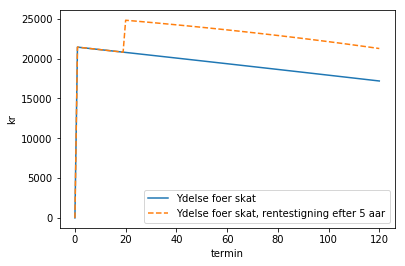

In [4]:
#hvad hvis renten stiger?
plt.plot(F5.Ys, label = 'Ydelse foer skat')

F5_2 = Laan(H,b,r,ts)
F5_2.skift(n=4*5, r=2.0/4/100, b=0.85/4/100)
plt.plot(F5_2.Ys,'--', label = 'Ydelse foer skat, rentestigning efter 5 aar')

plt.legend()
plt.ylabel('kr')
plt.xlabel('termin')



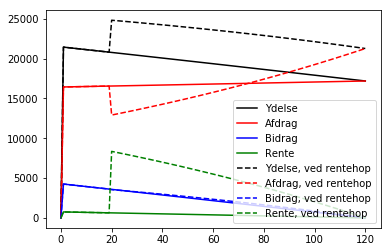

In [5]:
# Hvor meget af min ydelse gaar egentlig til at nedbringe min gaeld?
plt.plot(F5.Ys, label = 'Ydelse', c = "k")
plt.plot(F5.Af, label = 'Afdrag',c = "r")
plt.plot(F5.Bs, label = 'Bidrag',c = "b")
plt.plot(F5.Rs, label = 'Rente', c = "g" )

plt.plot(F5_2.Ys, '--',label = 'Ydelse, ved rentehop', c = "k")
plt.plot(F5_2.Af, '--',label = 'Afdrag, ved rentehop',c = "r")
plt.plot(F5_2.Bs, '--',label = 'Bidrag, ved rentehop',c = "b")
plt.plot(F5_2.Rs, '--',label = 'Rente, ved rentehop', c = "g")

plt.legend(loc = 4)


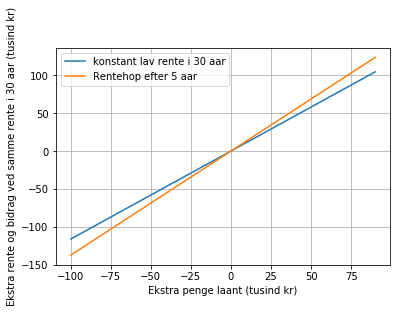

In [6]:
# hvad koster det i bidrag og rente over 30 aar at laane til moebler og hvor meget spares ved at skyde hele min opsparing ind (laane mindre)?
Hs = np.arange(1900000,2100000, 10000) 
Rente_og_bidrag1 = np.zeros(Hs.shape)
Rente_og_bidrag2 = np.zeros(Hs.shape)

for n, H in enumerate(Hs):
    L1 = Laan(H, b, r, ts)
    Rente_og_bidrag1[n] = L1.Ys.sum()-F5.Ys.sum()
    L1.skift(n=4*5, r=2.0/4/100, b=0.85/4/100)
    Rente_og_bidrag2[n] = L1.Ys.sum()-F5_2.Ys.sum()
    
plt.plot((Hs-2000000)/1000, Rente_og_bidrag1/1000.0, label ="konstant lav rente i 30 aar")
plt.plot((Hs-2000000)/1000, Rente_og_bidrag2/1000.0, label ="Rentehop efter 5 aar")
plt.ylabel('Ekstra rente og bidrag ved samme rente i 30 aar (tusind kr)')
plt.xlabel("Ekstra penge laant (tusind kr)")
plt.legend()
plt.grid()


